# Visualizing MDS from Derrarc2015's Movies & Placetypes

* 3D Plot is interactive! You can twist & turn and also disable & enable individual categories using the legend!

In [ ]:
import os
from dotenv.main import load_dotenv
load_dotenv("../docker/.env")
assert os.getenv("MONGO_INITDB_ROOT_USERNAME") and os.getenv("MONGO_INITDB_ROOT_PASSWORD")

In [ ]:
from io import StringIO
from os.path import join

import incense
from incense import ExperimentLoader
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages

from derive_conceptualspace.analysis.plots import scatter_2d, scatter_3d, set_seaborn
from fb_classifier.settings import CLASSIFIER_CHECKPOINT_PATH, SUMMARY_PATH, MONGO_URI, DATA_BASE
from derive_conceptualspace.load_data.load_semanticspaces import get_classes, load_mds_representation, get_names
from derive_conceptualspace.load_data.dataset_specifics import load_dataset_class

In [ ]:
DATA_DIR = "/home/chris/Documents/UNI_neu/Masterarbeit/data_new/semanticspaces/"
set_seaborn()

In [ ]:
def show_exp(mds_dim, tsne_dim, data_set, exp_name, cat_name, **kwargs):
    loader = ExperimentLoader(
        mongo_uri=MONGO_URI, 
        db_name='Masterarbeit'
    )
    tsne_exps = loader.find_by_name(exp_name)
    latest_tsne = [i for i in tsne_exps if i.status == "COMPLETED" and i.config.get("tsne_dims") == tsne_dim and i.config.get("mds_dimensions") == mds_dim and i.config.get("data_set") == data_set][-1]

    tsne_arr = pd.read_csv(StringIO(latest_tsne.artifacts["tSNE"].content.decode("UTF-8")))
    classes = get_classes(DATA_DIR, data_set, what=cat_name)
    try:
        load_dataset_class(data_set)
    except AttributeError:
        pass
    else:
        if hasattr(load_dataset_class(data_set), "CATNAMES") and cat_name in load_dataset_class(data_set).CATNAMES:
            classes = {k: load_dataset_class(data_set).CATNAMES[cat_name][v] for k,v in classes.items()}

    tsne_arr[cat_name] = tsne_arr["Name"].apply(lambda x: classes.get(x, "None")) 
    tsne_arr[cat_name] = [(val if isinstance(val,str) else val[0]) if val else "unknown" for val in tsne_arr[cat_name]]
    
    tsne_arr = tsne_arr.rename(columns=dict(tsne_1="x", tsne_2="y", tsne_3="z"))

    mds = load_mds_representation(DATA_DIR, data_set, mds_dim)
    names = get_names(DATA_DIR, data_set)

    #display_mds(mds, names, max_elems=2)
    
    if tsne_dim == 3:
        return scatter_3d(tsne_arr, cat_name, **kwargs)
    return scatter_2d(tsne_arr, cat_name, **kwargs)

## Movies

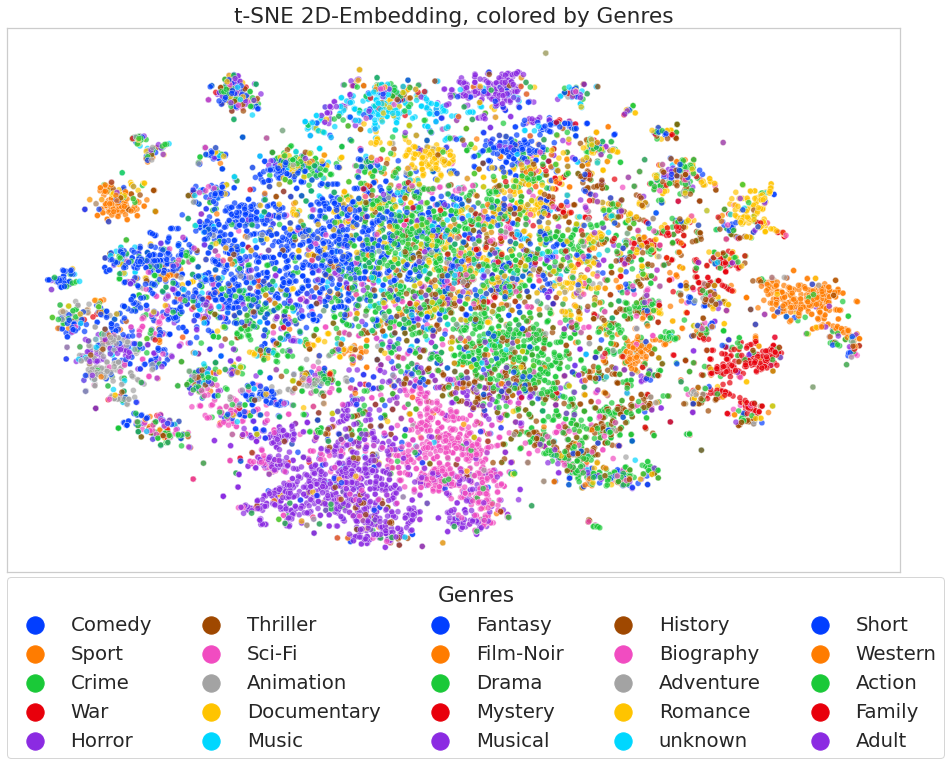

Saved under /home/chris/Documents/UNI_neu/Masterarbeit/data_new/semanticspaces/scatter_mds_tsne_movies_Genres.pdf


In [ ]:
# show_exp(100, 2, "courses", "Create_tSNE", "Fachbereich")
# show_exp(100, 3, "courses", "Create_tSNE", "Fachbereich")

dataset, classes = "movies", "Genres"
savepath = join(DATA_DIR, f"scatter_mds_tsne_{dataset}_{classes}.pdf")

with PdfPages(savepath) as pdf:
    fig = show_exp(100, 2, dataset, "Create_tSNE", classes, legend_cols=5)
    pdf.savefig(fig, bbox_inches='tight')
print(f"Saved under {savepath}")

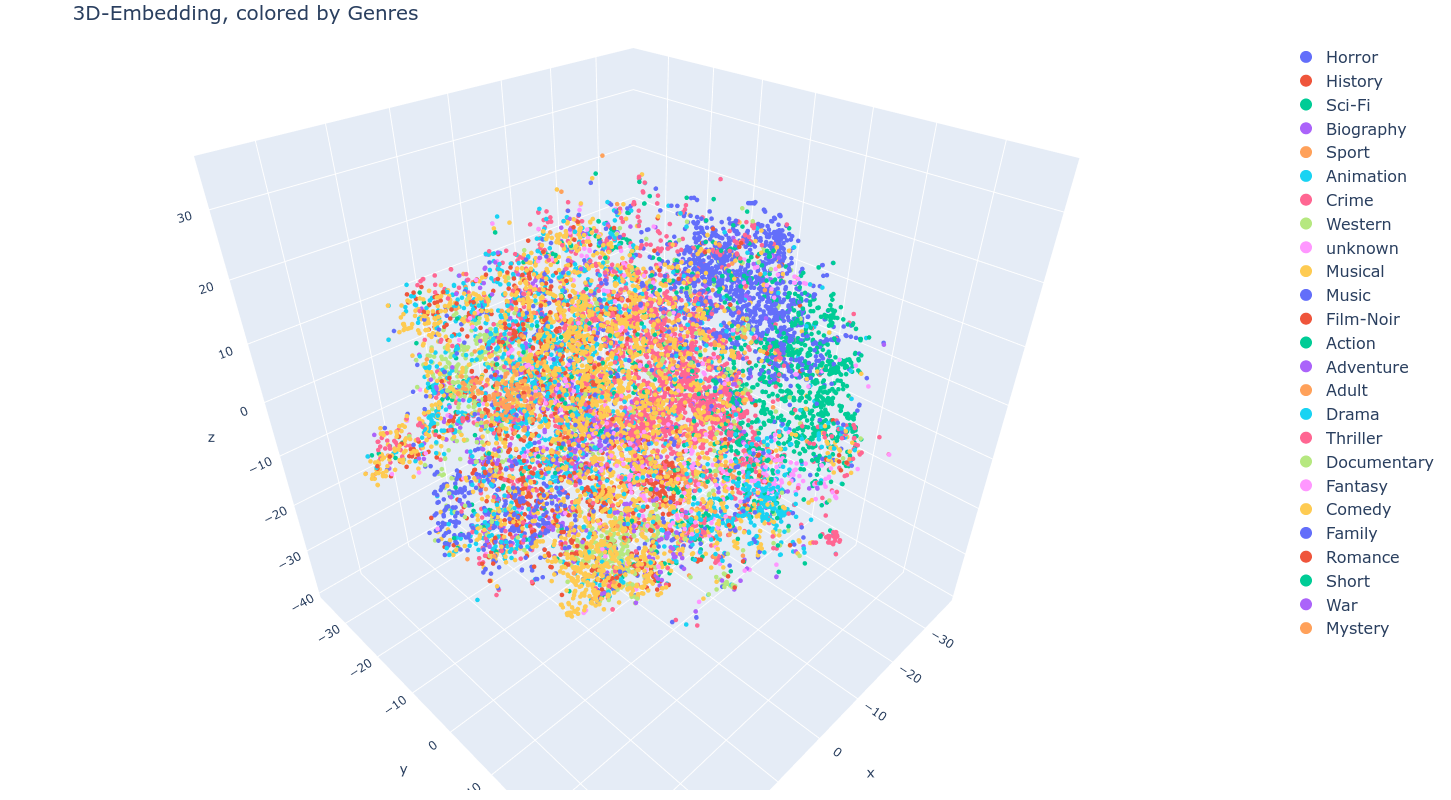

Experiment(id=4, name=Create_tSNE)

In [ ]:
show_exp(100, 3, "movies", "Create_tSNE", "Genres")

## Placetypes

In [ ]:
dataset, classes = "places", "Geonames"
savepath = join(DATA_DIR, f"scatter_mds_tsne_{dataset}_{classes}.pdf")

with PdfPages(savepath) as pdf:
    fig = show_exp(100, 2, dataset, "Create_tSNE", classes, legend_cols=3)
    pdf.savefig(fig, bbox_inches='tight')
print(f"Saved under {savepath}")

In [ ]:
show_exp(100, 3, "places", "Create_tSNE", "Geonames")